1. Загрузить файл hr.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

In [152]:
data = pd.read_csv('hr.csv')
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [153]:
# взглянем на данные
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [155]:
# список колонок
columns = data.columns
columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение) 

In [156]:
# потренируемся на первой переменной 'satisfaction_level'
sat_level = data[columns[0]]

In [157]:
sat_level_mean = sat_level.mean()
sat_level_s2 = sum([(sat_level_elem - sat_level_mean)**2 for sat_level_elem in sat_level]) / (len(sat_level) - 1)
sat_level_s = (sum([(sat_level_elem - sat_level_mean)**2 for sat_level_elem in sat_level]) / (len(sat_level)-1)) ** 0.5
sat_level_mode = sat_level.mode()[0]
sat_level_075_025 = list(set(sorted(sat_level)[: int(len(sat_level)*0.75 + 1)]) - 
                         set(sorted(sat_level)[: int(len(sat_level)*0.25 + 1)]))
sat_level_mu = (float(sorted(sat_level)[len(sat_level)//2 - 1]) + float(sorted(sat_level)[len(sat_level)//2])) / 2
X75 = sorted(sat_level)[: int(len(sat_level)*0.75 + 1)][-1]
X25 = sorted(sat_level)[: int(len(sat_level)*0.25 + 1)][-1]
sat_level_min = sat_level.min()
sat_level_max = sat_level.max()

In [158]:
print(f"mean (выборочное среднее): {sat_level_mean}")
print(f"s2 (выборочная дисперсия) : {sat_level_s2}")
print(f"s (среднеквадратическое отклонение) : {sat_level_s}")
print(f"mode (мода): {sat_level_mode}")
print(f"X 75 (75%-й квантиль) : {X75}")
print(f"X 25 (25%-й квантиль) : {X25}")
print(f"mu (медиана, 50%-й квантиль) : {sat_level_mu}")
print(f"min (наименьшее значение) : {sat_level_min}")
print(f"max (наибольшее значение) : {sat_level_max}")

mean (выборочное среднее): 0.6128335222348166
s2 (выборочная дисперсия) : 0.061817200647087255
s (среднеквадратическое отклонение) : 0.2486306510611418
mode (мода): 0.1
X 75 (75%-й квантиль) : 0.82
X 25 (25%-й квантиль) : 0.44
mu (медиана, 50%-й квантиль) : 0.64
min (наименьшее значение) : 0.09
max (наибольшее значение) : 1.0


In [159]:
# проверим себя
data.describe(percentiles=[0.25, 0.5, 0.75, 0.9])

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
90%,0.920000,0.950000,5.000000,267.000000,5.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [160]:
data.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


In [161]:
columns[:-2]

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years'],
      dtype='object')

In [162]:
# теперь посчитаем для всех полей с числовыми данными (все, кроме последних двух)
# запишем результаты в виде списка словарей
metrics = []

for column in columns[:-2]:
    column_mean = {column+' (mean)': (sum(data[column])/len(data[column])) for column in columns[:-2]}
    metrics.append(column_mean)
    column_mu = {column+' (mu)': (float(sorted(data[column])[len(data[column])//2 - 1]) 
                                  + float(sorted(data[column])[len(data[column])//2])) / 2 for column in columns[:-2]}
    metrics.append(column_mu)
    column_mode = {column+' (mode)': data[column].mode()[0] for column in columns[:-2]}
    metrics.append(column_mode)
    column_max = {column+' (max)': data[column].max() for column in columns[:-2]}
    metrics.append(column_max)
    column_min = {column+' (min)': data[column].min() for column in columns[:-2]}
    metrics.append(column_min)
    column_std = {column+' (std)': data[column].std() for column in columns[:-2]}
    metrics.append(column_std)


In [163]:
metrics

[{'satisfaction_level (mean)': 0.6128335222348166,
  'last_evaluation (mean)': 0.7161017401159978,
  'number_project (mean)': 3.80305353690246,
  'average_montly_hours (mean)': 201.0503366891126,
  'time_spend_company (mean)': 3.498233215547703,
  'Work_accident (mean)': 0.1446096406427095,
  'left (mean)': 0.2380825388359224,
  'promotion_last_5years (mean)': 0.021268084538969265},
 {'satisfaction_level (mu)': 0.64,
  'last_evaluation (mu)': 0.72,
  'number_project (mu)': 4.0,
  'average_montly_hours (mu)': 200.0,
  'time_spend_company (mu)': 3.0,
  'Work_accident (mu)': 0.0,
  'left (mu)': 0.0,
  'promotion_last_5years (mu)': 0.0},
 {'satisfaction_level (mode)': 0.1,
  'last_evaluation (mode)': 0.55,
  'number_project (mode)': 4,
  'average_montly_hours (mode)': 135,
  'time_spend_company (mode)': 3,
  'Work_accident (mode)': 0,
  'left (mode)': 0,
  'promotion_last_5years (mode)': 0},
 {'satisfaction_level (max)': 1.0,
  'last_evaluation (max)': 1.0,
  'number_project (max)': 7,
  '

3. Рассчитать и визуализировать корреляционную матрицу для переменных 

In [164]:
corr = data.corr()
corr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


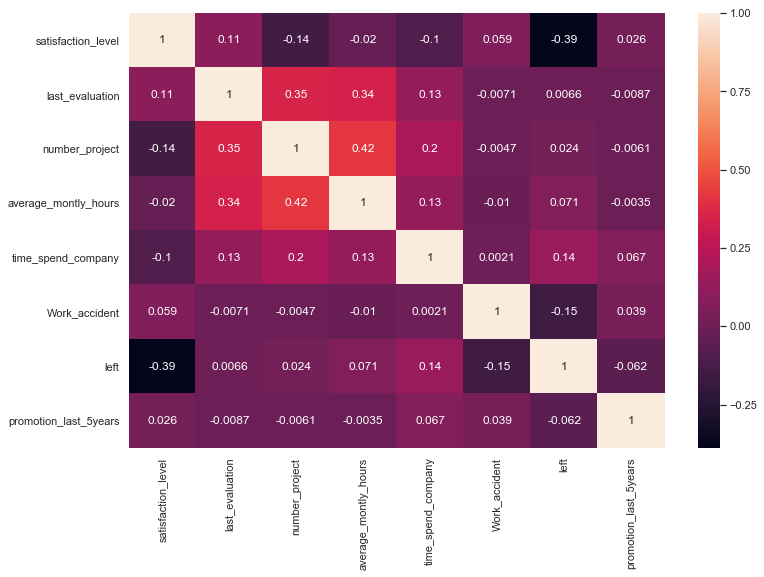

In [165]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,8)})
sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [166]:
# видим, что возможно с количеством проектов (number_project) 
# довольно сильно связан уровень удовлетворенности (satisfaction_level) и среднее кол-во часов в месяц (average_montly_hours)


4. Визуализировать несколько взаимосвязей между переменными 

In [167]:
# создадим функцию, которая ранжирует людей ар уровню удовлетворенности
def satisfaction_level_category(x):
    if x<=0.2:
        return int(1)
    elif x<=0.4:
        return int(2)
    elif x<=0.6:
        return int(3)
    elif x<=0.8:
        return int(4)
    elif x<=0.9:
        return int(5)
    else:
        return int(6)

In [168]:
# проверим функцию
satisfaction_level_category(0.21)

2

In [169]:
# добавим дополнительное поле 'satisfaction_level_category'
data['satisfaction_level_category'] = data['satisfaction_level'].apply(lambda x: (satisfaction_level_category(x)))

In [170]:
# проверим, появилось ли новое поле
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary,satisfaction_level_category
0,0.38,0.53,2,157,3,0,1,0,sales,low,2
1,0.80,0.86,5,262,6,0,1,0,sales,medium,4
2,0.11,0.88,7,272,4,0,1,0,sales,medium,1
3,0.72,0.87,5,223,5,0,1,0,sales,low,4
4,0.37,0.52,2,159,3,0,1,0,sales,low,2


In [171]:
# посчитаем кол-во сотрудников по уровню удовлетворенности (6 групп)
data[['satisfaction_level_category', 'number_project']].groupby('satisfaction_level_category').count()

,number_project
satisfaction_level_category,
1,1478
2,1646
3,3605
4,4268
5,2218
6,1784


In [172]:
# посчитаем кол-во сотрудников по кол-ву проектов в работе (6 групп)
data[['satisfaction_level_category', 'number_project']].groupby('number_project').count()

,satisfaction_level_category
number_project,
2,2388
3,4055
4,4365
5,2761
6,1174
7,256


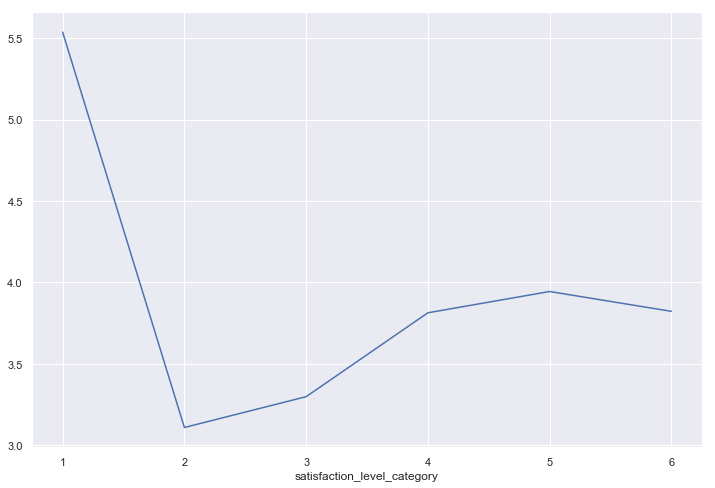

In [173]:

# выберем нужные 2 колонки и сгруппируем по уровню удовлетворенности (satisfaction_level_category) и посчитаем среднее кол-во проектов для каждой группы
data[['number_project', 'satisfaction_level_category']].sort_values(by='satisfaction_level_category').reset_index().groupby('satisfaction_level_category').mean()['number_project']
# посмотрим на график (как меняется кол-во проектов при изменении уровня удовлетворенности)
data[['number_project', 'satisfaction_level_category']].\
    sort_values(by='satisfaction_level_category').reset_index().\
        groupby('satisfaction_level_category').mean()['number_project'].plot() 
        

In [174]:
# сотрудники с высокой нагрузкой крайне недовольны!
data[['number_project', 'satisfaction_level_category']].sort_values(by='satisfaction_level_category').reset_index().groupby('satisfaction_level_category').mean()['number_project']

satisfaction_level_category
1    5.536536
2    3.109964
3    3.299029
4    3.813964
5    3.944545
6    3.822870
Name: number_project, dtype: float64

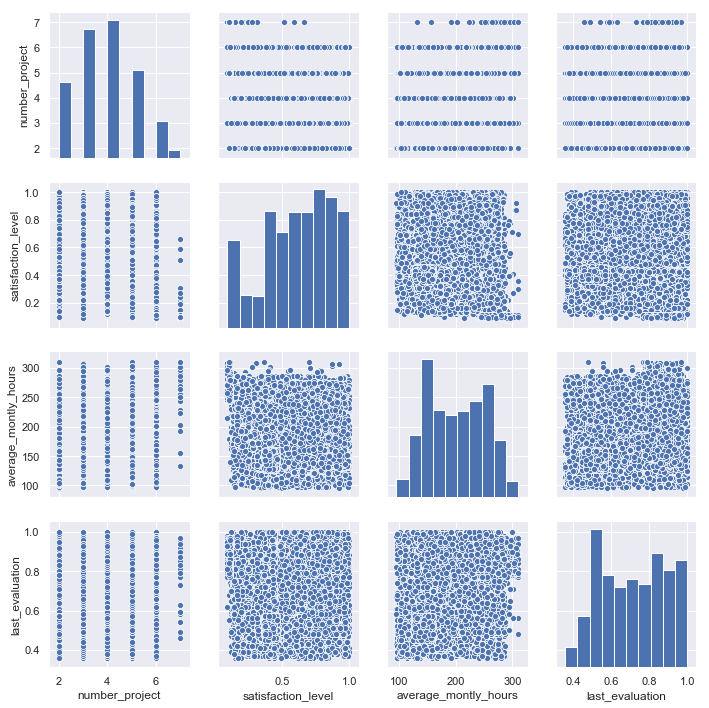

In [206]:
import seaborn as sns
# c svg pairplot браузер начинает тормозить, установим png
%config InlineBackend.figure_format = 'png' 
sns_plot = sns.pairplot(
    data[['number_project', 'satisfaction_level', 'average_montly_hours', 'last_evaluation']]);
sns_plot.savefig('pairplot2.png')
#посмотрим на корелляции четырех показателей

5. С использованием t-test статистики проверить взаимосвязи между несколькими переменными 

In [207]:
sts.ttest_1samp(data['average_montly_hours'], 201) # проверим гипотезу о том, что средняя выработка равна 201 час в месяц

Ttest_1sampResult(statistic=0.12343556484996877, pvalue=0.9017638497489203)

In [ ]:
# можем принят гипотезу

In [209]:
# гипотеза: от департамента не зависит показатель last_evaluation
sales = data[data['sales'] == 'sales']['last_evaluation']
support = data[data['sales'] == 'support']['last_evaluation']
sts.ttest_ind(sales, support) 

Ttest_indResult(statistic=-2.974406389016937, pvalue=0.0029465744566986012)

In [ ]:
# скорее нужно отказаться от этой гипотезы

6. Рассчитать сколько работников работает в каждом департаменте 

In [210]:
# какие есть значения в поле 'sales' ?
data.sales.values

array(['sales', 'sales', 'sales', ..., 'support', 'support', 'support'],
      dtype=object)

In [211]:
# найдем все уникальные значения в поле 'sales' и поместим их в список
unique_dep = []
for i in data.sales.values:
    if i not in unique_dep:
        unique_dep.append(i)
print(unique_dep, ('\n' + str(len(unique_dep)) + ' разных департаментов'))

['sales', 'accounting', 'hr', 'technical', 'support', 'management', 'IT', 'product_mng', 'marketing', 'RandD'] 
10 разных департаментов


In [212]:
# найдем численность людей в каждом департаменте
for dep in unique_dep:
    number_of_personal = {dep : len(data['sales'][data['sales'] == dep]) for dep in unique_dep}
number_of_personal # словарь с ключом "департамент" и значением "численность"

{'sales': 4140,
 'accounting': 767,
 'hr': 739,
 'technical': 2720,
 'support': 2229,
 'management': 630,
 'IT': 1227,
 'product_mng': 902,
 'marketing': 858,
 'RandD': 787}

In [213]:
# проверим общее кол-во специалистов. В сумме должно получаться 14999
sum(number_of_personal.values())

14999

7. Показать распределение сотрудников по зарплатам 

In [214]:
# найдем все уникальные значения в поле 'sales' и поместим их в список
unique_salary_group = []
for i in data.salary.values:
    if i not in unique_salary_group:
        unique_salary_group.append(i)
print(unique_salary_group, ('\n' + str(len(unique_salary_group)) + ' категории зарплаты'))

['low', 'medium', 'high'] 
3 категории зарплаты


In [215]:
# проверим, чему равна сумма численностей всех трех групп по зарплате
len(data.salary[data['salary'] == 'low']) \
    + len(data.salary[data['salary'] == 'medium']) \
        + len(data.salary[data['salary'] == 'high'])

14999

In [216]:
employee_dist_dict = {} # соберем в словарь значения численности групп по зарплате (значения) и названия групп (ключи)
for i in unique_salary_group:
    dict_1 = {i : len(data['salary'][data['salary'] == i])}
    employee_dist_dict.update(dict_1)
employee_dist_dict

{'low': 7316, 'medium': 6446, 'high': 1237}

In [217]:
# создадим объект Series
employee_dist = pd.Series(employee_dist_dict)
employee_dist

low       7316
medium    6446
high      1237
dtype: int64

In [218]:
# сделаем индексы значениями
employee_dist = pd.Series(employee_dist_dict).reset_index()
employee_dist

,index,0
0,low,7316
1,medium,6446
2,high,1237


In [219]:
# переименуем столбцы
employee_dist = employee_dist.rename({'index' : 'salary_rate', 0:'amount'}, axis=1)

In [220]:
employee_dist

,salary_rate,amount
0,low,7316
1,medium,6446
2,high,1237


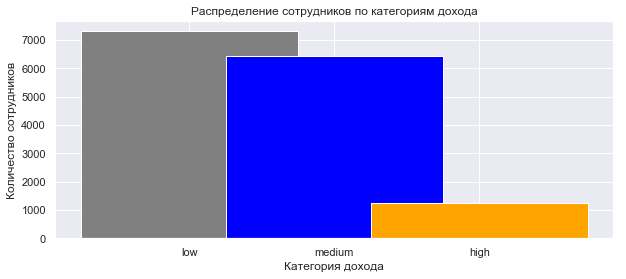

In [221]:
# визуализируем распределение по зарплатам
xdata = list(employee_dist['salary_rate'])
ydata = list(employee_dist['amount'])
colors = ['grey', 'blue', 'orange']
plt.figure(figsize=(10, 4))
plt.bar (xdata, ydata, align='center', width=1.5, color = colors)
plt.ylabel('Количество сотрудников')
plt.xlabel('Категория дохода')
plt.title('Распределение сотрудников по категориям дохода')
plt.show()

8. Показать распределение сотрудников по зарплатам совместно с департаментами 

In [222]:
# сгруппируем по департаменту и ЗП
grouped_data = data.groupby(['sales', 'salary']).count()
grouped_data

satisfaction_level  last_evaluation  number_project  \
sales       salary                                                        
IT          high                    83               83              83   
            low                    609              609             609   
            medium                 535              535             535   
RandD       high                    51               51              51   
            low                    364              364             364   
            medium                 372              372             372   
accounting  high                    74               74              74   
            low                    358              358             358   
            medium                 335              335             335   
hr          high                    45               45              45   
            low                    335              335             335   
            medium                 359              359             359   
management  high                   225              225             225   
            low                    180              180             180   
            medium                 225              225             225   
marketing   high                    80               80              80   
            low                    402              402             402   
            medium                 376              376             376   
product_mng high                    68               68              68   
            low                    451              451             451   
            medium                 383              383             383   
sales       high                   269              269             269   
            low                   2099             2099            2099   
            medium                1772             1772            1772   
support     high                   141              141             141   
            low                   1146             1146            1146   
            medium                 942              942             942   
technical   high                   201              201             201   
            low                   1372             1372            1372   
            medium                1147             1147            1147   

                    average_montly_hours  time_spend_company  Work_accident  \
sales       salary                                                            
IT          high                      83                  83             83   
            low                      609                 609            609   
            medium                   535                 535            535   
RandD       high                      51                  51             51   
            low                      364                 364            364   
            medium                   372                 372            372   
accounting  high                      74                  74             74   
            low                      358                 358            358   
            medium                   335                 335            335   
hr          high                      45                  45             45   
            low                      335                 335            335   
            medium                   359                 359            359   
management  high                     225                 225            225   
            low                      180                 180            180   
            medium                   225                 225            225   
marketing   high                      80                  80             80   
            low                      402                 402            402   
            medium                   376                 376            376   
product_mng high                      6

In [223]:
# все столбцы не нужны, оставим самый первый 'satisfaction_level'
grouped_data = grouped_data[[grouped_data.columns[0]]]
grouped_data

satisfaction_level
sales       salary                    
IT          high                    83
            low                    609
            medium                 535
RandD       high                    51
            low                    364
            medium                 372
accounting  high                    74
            low                    358
            medium                 335
hr          high                    45
            low                    335
            medium                 359
management  high                   225
            low                    180
            medium                 225
marketing   high                    80
            low                    402
            medium                 376
product_mng high                    68
            low                    451
            medium                 383
sales       high                   269
            low                   2099
            medium                1772
support     high                   141
            low                   1146
            medium                 942
technical   high                   201
            low                   1372
            medium                1147

In [224]:
# трансформируем Dataframe в Series
grouped_data=grouped_data.stack()
grouped_data

sales        salary                    
IT           high    satisfaction_level      83
             low     satisfaction_level     609
             medium  satisfaction_level     535
RandD        high    satisfaction_level      51
             low     satisfaction_level     364
             medium  satisfaction_level     372
accounting   high    satisfaction_level      74
             low     satisfaction_level     358
             medium  satisfaction_level     335
hr           high    satisfaction_level      45
             low     satisfaction_level     335
             medium  satisfaction_level     359
management   high    satisfaction_level     225
             low     satisfaction_level     180
             medium  satisfaction_level     225
marketing    high    satisfaction_level      80
             low     satisfaction_level     402
             medium  satisfaction_level     376
product_mng  high    satisfaction_level      68
             low     satisfaction_level     451


In [225]:
type(grouped_data)

pandas.core.series.Series

In [226]:
# будем использовать отсортированный список департаментов
sorted(unique_dep)

['IT',
 'RandD',
 'accounting',
 'hr',
 'management',
 'marketing',
 'product_mng',
 'sales',
 'support',
 'technical']

In [227]:
# првоерим, как работают трезы при наличии индексов разных уровней (прихотливая индексация)
grouped_data['IT', 'high']

satisfaction_level    83
dtype: int64

In [228]:
grouped_data[:, 'high']

sales                          
IT           satisfaction_level     83
RandD        satisfaction_level     51
accounting   satisfaction_level     74
hr           satisfaction_level     45
management   satisfaction_level    225
marketing    satisfaction_level     80
product_mng  satisfaction_level     68
sales        satisfaction_level    269
support      satisfaction_level    141
technical    satisfaction_level    201
dtype: int64

In [229]:
# для построения визуализации соберем в списки значения low, medium и high зарплат по департаментам
list_low = []
for i in range(0,len(unique_dep)):
    low = grouped_data[sorted(unique_dep)[i], 'low'][0]
    list_low.append(low)
list_low

[609, 364, 358, 335, 180, 402, 451, 2099, 1146, 1372]

In [230]:
list_medium = []
for i in range(0,len(unique_dep)):
    medium = grouped_data[sorted(unique_dep)[i], 'medium'][0]
    list_medium.append(medium)
list_medium

[535, 372, 335, 359, 225, 376, 383, 1772, 942, 1147]

In [231]:
list_high = []
for i in range(0,len(unique_dep)):
    high = grouped_data[sorted(unique_dep)[i], 'high'][0]
    list_high.append(high)
list_high

[83, 51, 74, 45, 225, 80, 68, 269, 141, 201]

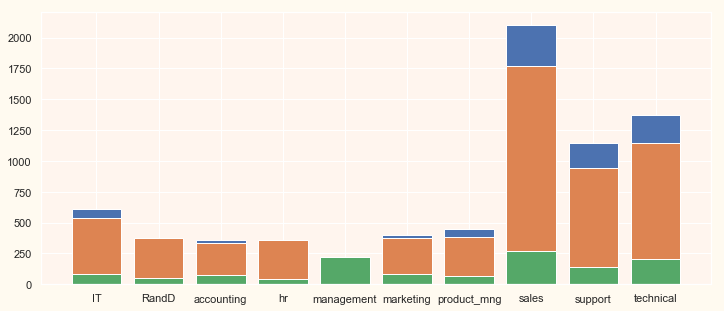

In [232]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

x = list(sorted(unique_dep))
y1 = list_low
y2 = list_medium
y3 = list_high

fig, ax = plt.subplots()

ax.bar(x, y1)
ax.bar(x, y2)
ax.bar(x, y3)

ax.set_facecolor('seashell')
fig.set_figwidth(12)    #  ширина Figure
fig.set_figheight(5)    #  высота Figure
fig.set_facecolor('floralwhite')

plt.show()

In [ ]:
# результат выше не очень наглядныйй, т.к. например менеджеры с высокой ЗП "закрывают" менеджеров с низкой и средней ЗП

Populating the interactive namespace from numpy and matplotlib


C:\Users\User\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning:

pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy



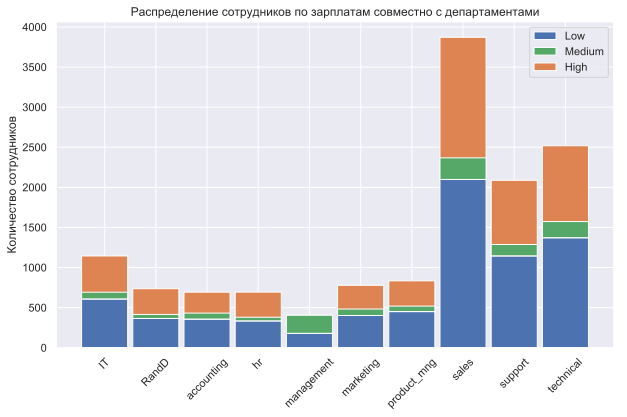

In [233]:
# другой вариант
import numpy as np
import matplotlib.pyplot as plt
# для отображения графиков прямо в jupyter notebook
%pylab inline
# просим отображать графики в svg для большей четкости
%config InlineBackend.figure_format = 'svg' 

#увеличим размер графиков по умолчанию
from pylab import rcParams
rcParams['figure.figsize'] = 10,6

N = list(sorted(unique_dep))

ind = np.arange(len(sorted(unique_dep)))    # департаменты по оси х
width = 0.9       # ширина столбиков

p1 = plt.bar(ind, list_low, width)
p3 = plt.bar(ind, list_medium, width,
             bottom=list_low)
p2 = plt.bar(ind, list_high, width,
             bottom=list_low)

plt.ylabel('Количество сотрудников')
plt.title('Распределение сотрудников по зарплатам совместно с департаментами')
plt.xticks(ind, sorted(unique_dep), rotation=45)
plt.legend((p1[0], p2[0], p3[0]), ('Low', 'Medium', 'High'))

plt.show()

9. Сколько сотрудников покинули компанию 

In [235]:
len(data.left[data['left'] == 1])

3571

In [236]:
len(data.left[data['left'] != 1])

11428

In [238]:
len(data.left[data['left'] == 1]) + len(data.left[data['left'] != 1]) == 14999

True

10. Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию 

In [ ]:
# Выдвинем 2 гипотезы.
# 1. компанию чаще покидают сотрудники, которые: 
#1. работают в продажах, 
#2. имеют высокую загрузку (количество часов в месяц). Чем выше загрузка, тем больше текучесть кадров

In [307]:
# определим текучесть персонала по департаментам (отношение ушедших к общему числу сотрудников за рассматриваемый период в процентах)
for dep in sorted(unique_dep):
    #staff_turnover = len(data[data['sales']== dep][data['left']==1])/len(data[data['sales'] == dep])
    staff_turnover = {dep : len(data[(data['sales']== dep) & (data['left']==1)])/len(data[data['sales'] == dep])*100 for dep in sorted(unique_dep)}
    #print(dep, '=', staff_turnover)
staff_turnover

{'IT': 22.249388753056234,
 'RandD': 15.374841168996186,
 'accounting': 26.597131681877446,
 'hr': 29.093369418132614,
 'management': 14.444444444444443,
 'marketing': 23.65967365967366,
 'product_mng': 21.951219512195124,
 'sales': 24.492753623188406,
 'support': 24.89905787348587,
 'technical': 25.624999999999996}

In [ ]:
# наибольший показатель в hr. Были не правы по поводу продаж.

In [314]:
#посчитаем загрузку персонала (сколько часов в среднем часов работают сотрудники департаментов в месяц)
for dep in sorted(unique_dep):
    load = {dep : data[data['sales']== dep].mean()[3] for dep in sorted(unique_dep)}
    
load

{'IT': 202.2159739201304,
 'RandD': 200.8005082592122,
 'accounting': 201.16297262059973,
 'hr': 198.68470906630583,
 'management': 201.24920634920636,
 'marketing': 199.3857808857809,
 'product_mng': 199.96563192904657,
 'sales': 200.91135265700484,
 'support': 200.75818752803949,
 'technical': 202.49742647058824}

In [335]:
# соберем в датафрейм результаты
s4 = pd.Series(staff_turnover)
s3 = pd.Series(load)
s5 = pd.concat([s3, s4], axis=1)
s5.columns = ['Средняя выработка', 'Текучесть персонала']
s5

,Средняя выработка,Текучесть персонала
IT,202.215974,22.249389
RandD,200.800508,15.374841
accounting,201.162973,26.597132
hr,198.684709,29.093369
management,201.249206,14.444444
marketing,199.385781,23.659674
product_mng,199.965632,21.951220
sales,200.911353,24.492754
support,200.758188,24.899058
technical,202.497426,25.625000


In [336]:
# посмотрим, какова корелляция между загрузкой и текучестью персонала
s5.corr()

,Средняя выработка,Текучесть персонала
Средняя выработка,1.000000,-0.244902
Текучесть персонала,-0.244902,1.000000


In [ ]:
# отрицательная. 
#Можно предположить, что чем больше загрузка людей в департаментах, тем реже они уходят (до определенного предела, конечно)
# Корелляция небольшая, но все равно далека от ноля.

11. Загрузить результат (в формате .ipynbноутбука) в репозиторий.Разместить ссылку на репозиторийв лкна сайте